# Comparaci√≥n de Clasificaci√≥n de Subjetividad y Agrupaci√≥n por Sentimiento

Este notebook realiza una comparaci√≥n exhaustiva entre los diferentes m√©todos de clasificaci√≥n de subjetividad implementados:

## M√©todos a Comparar
1. **HuggingFace (SubjetividadConHF)**: Clasificaci√≥n binaria (Subjetivo/Objetivo)
2. **An√°lisis por Frases (SubjetividadConFrases)**: Clasificaci√≥n ternaria (Subjetivo/Objetivo/Mixta)  
3. **LLM (SubjetividadConLLM)**: Clasificaci√≥n ternaria (Subjetivo/Objetivo/Mixta)

**Nota**: El m√©todo LLM originalmente usa terminolog√≠a femenina (Subjetiva/Objetiva), pero se normaliza autom√°ticamente a terminolog√≠a masculina (Subjetivo/Objetivo) para permitir comparaciones consistentes.

## An√°lisis a Realizar
- Comparaci√≥n HF vs Frases: transiciones y cambios en clasificaci√≥n
- Comparaci√≥n Frases vs LLM: an√°lisis de coincidencias entre m√©todos ternarios
- An√°lisis de discrepancias: casos donde los m√©todos difieren
- Agrupaci√≥n final por sentimiento para el m√©todo seleccionado

In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path

sys.path.append('../scripts')

from subjetividad import (
    cargar_datos_para_comparacion,
    realizar_comparacion_completa,
    generar_visualizaciones_completas,
    ComparadorMetodosSubjetividad,
    analizar_discrepancias_completas
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("‚úÖ Librer√≠as y m√≥dulos importados correctamente")

‚úÖ Librer√≠as y m√≥dulos importados correctamente


## 1. Carga de Datos

Cargamos el dataset con los an√°lisis de subjetividad ya realizados por los diferentes m√©todos.

In [2]:
df = cargar_datos_para_comparacion('../data/processed/dataset_opiniones_analisis.csv')

‚úÖ Dataset cargado: 2464 opiniones
üìã Columnas de subjetividad disponibles: ['SubjetividadConHF', 'SubjetividadConFrases', 'SubjetividadConLLM']

üîç Valores √∫nicos detectados:
   ‚Ä¢ SubjetividadConHF: ['Subjetivo', 'Objetivo']
   ‚Ä¢ SubjetividadConFrases: ['Subjetivo', 'Mixta', 'Objetivo']
   ‚Ä¢ SubjetividadConLLM: ['Subjetiva', 'Mixta', 'Objetiva']

‚úÖ Normalizaci√≥n aplicada a SubjetividadConLLM:
   ‚Ä¢ 'Subjetiva' ‚Üí 'Subjetivo'
   ‚Ä¢ 'Objetiva' ‚Üí 'Objetivo'
   ‚Ä¢ SubjetividadConLLM valores normalizados: ['Subjetivo', 'Mixta', 'Objetivo']


## 2. Comparaci√≥n HuggingFace vs An√°lisis por Frases

An√°lisis de transiciones entre la clasificaci√≥n binaria de HuggingFace y la clasificaci√≥n ternaria del an√°lisis por frases.

In [3]:
comparador = ComparadorMetodosSubjetividad(df)
resultados_hf_frases = comparador.comparar_hf_vs_frases()
comparador.mostrar_comparacion_hf_frases(resultados_hf_frases)

üîÑ COMPARACI√ìN: HuggingFace vs An√°lisis por Frases

üìä Tabla de Contingencia:
SubjetividadConFrases  Mixta  Objetivo  Subjetivo   All
SubjetividadConHF                                      
Objetivo                 142        50          0   192
Subjetivo               1432        13        827  2272
All                     1574        63        827  2464

üìà Transiciones desde Subjetivo (HF): 2272 opiniones
   ‚Ä¢ Permanece Subjetivo: 827 (36.4%)
   ‚Ä¢ Se vuelve Mixta: 1432 (63.0%)
   ‚Ä¢ Se vuelve Objetivo: 13 (0.6%)

üìâ Transiciones desde Objetivo (HF): 192 opiniones
   ‚Ä¢ Permanece Objetivo: 50 (26.0%)
   ‚Ä¢ Se vuelve Mixta: 142 (74.0%)
   ‚Ä¢ Se vuelve Subjetivo: 0 (0.0%)


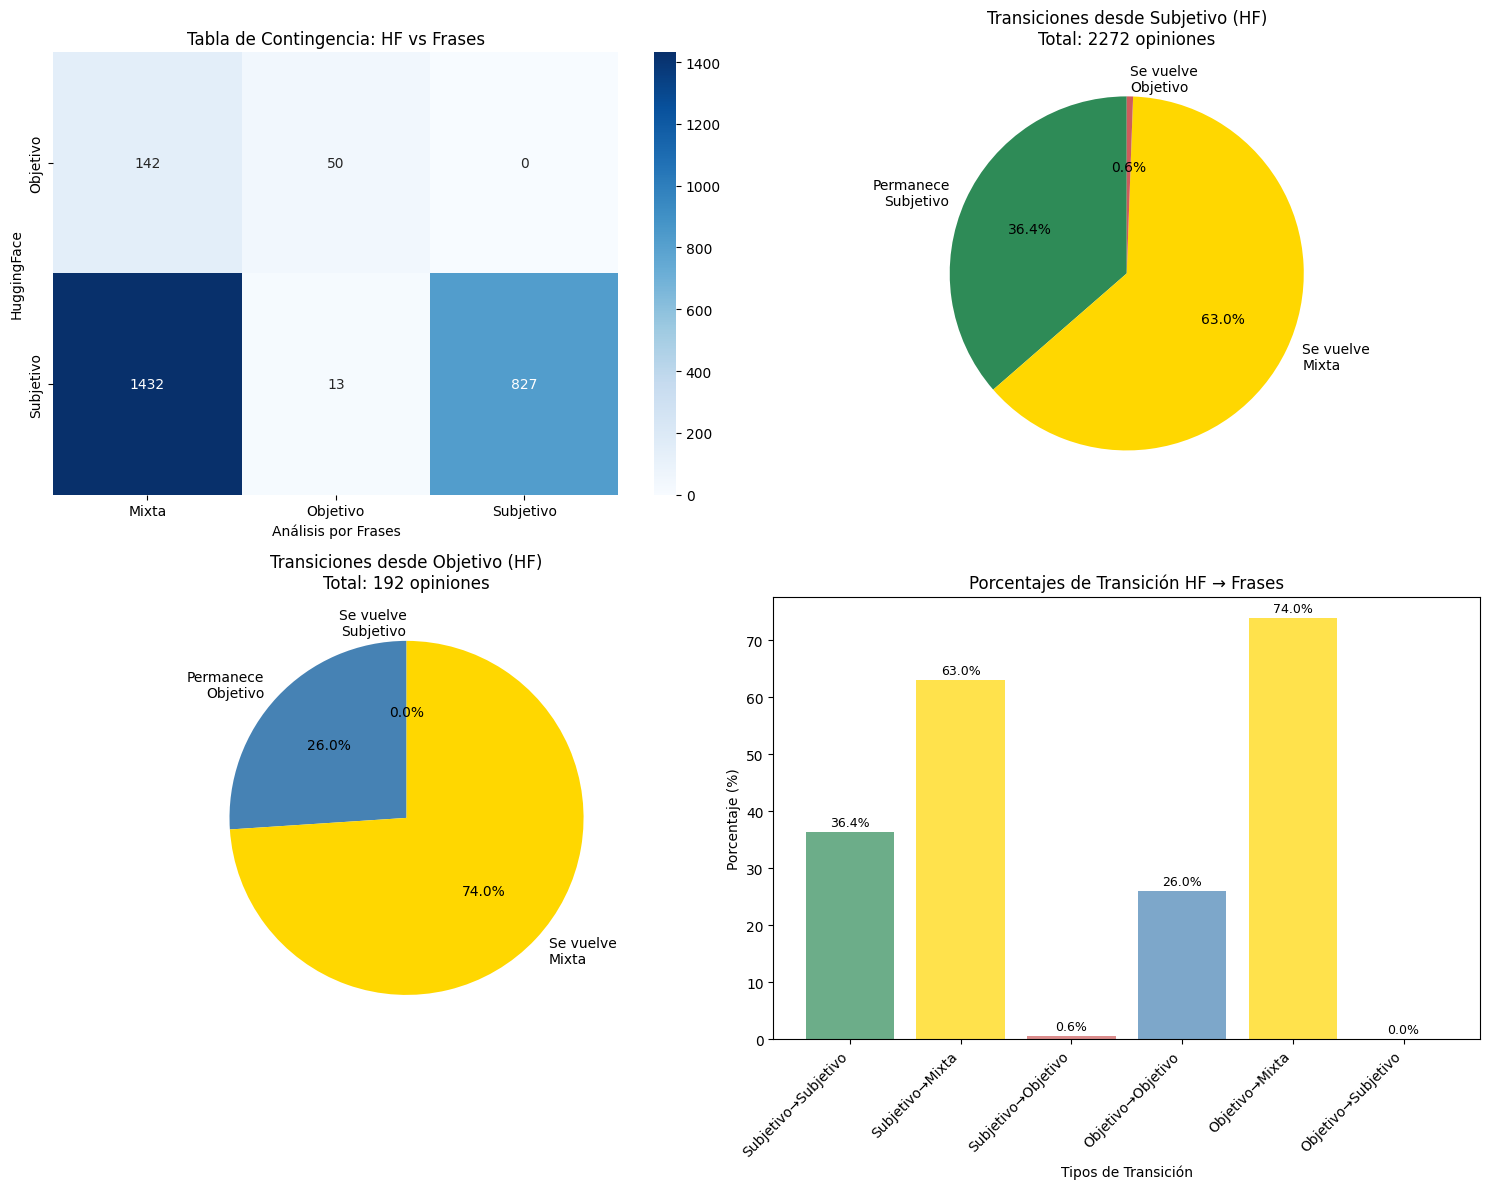

In [4]:
comparador.visualizar_comparacion_hf_frases(resultados_hf_frases)

## 3. Comparaci√≥n An√°lisis por Frases vs LLM (Solo Coincidencias)

An√°lisis enfocado √∫nicamente en las opiniones donde ambos m√©todos coinciden en la clasificaci√≥n.

In [5]:
resultados_frases_llm = comparador.comparar_frases_vs_llm_coincidencias()
comparador.mostrar_comparacion_frases_llm(resultados_frases_llm)

üîÑ COMPARACI√ìN: An√°lisis por Frases vs LLM (Solo Coincidencias)

üìä Tabla de Contingencia Completa:
SubjetividadConLLM     Mixta   All
SubjetividadConFrases             
Mixta                   1342  1342
Objetivo                  48    48
Subjetivo                423   423
All                     1813  1813

üéØ Resumen de Coincidencias:
   ‚Ä¢ Total de opiniones: 2464
   ‚Ä¢ Coincidencias totales: 1342
   ‚Ä¢ Porcentaje de coincidencia: 54.5%

üìà Coincidencias por Tipo:
   ‚Ä¢ Mixta: 1342 opiniones (85.3% de coincidencia)

üìã Distribuci√≥n en An√°lisis por Frases:
   ‚Ä¢ Mixta: 1574 (63.9%)
   ‚Ä¢ Subjetivo: 827 (33.6%)
   ‚Ä¢ Objetivo: 63 (2.6%)

üìã Distribuci√≥n en LLM:
   ‚Ä¢ Mixta: 1813 (73.6%)


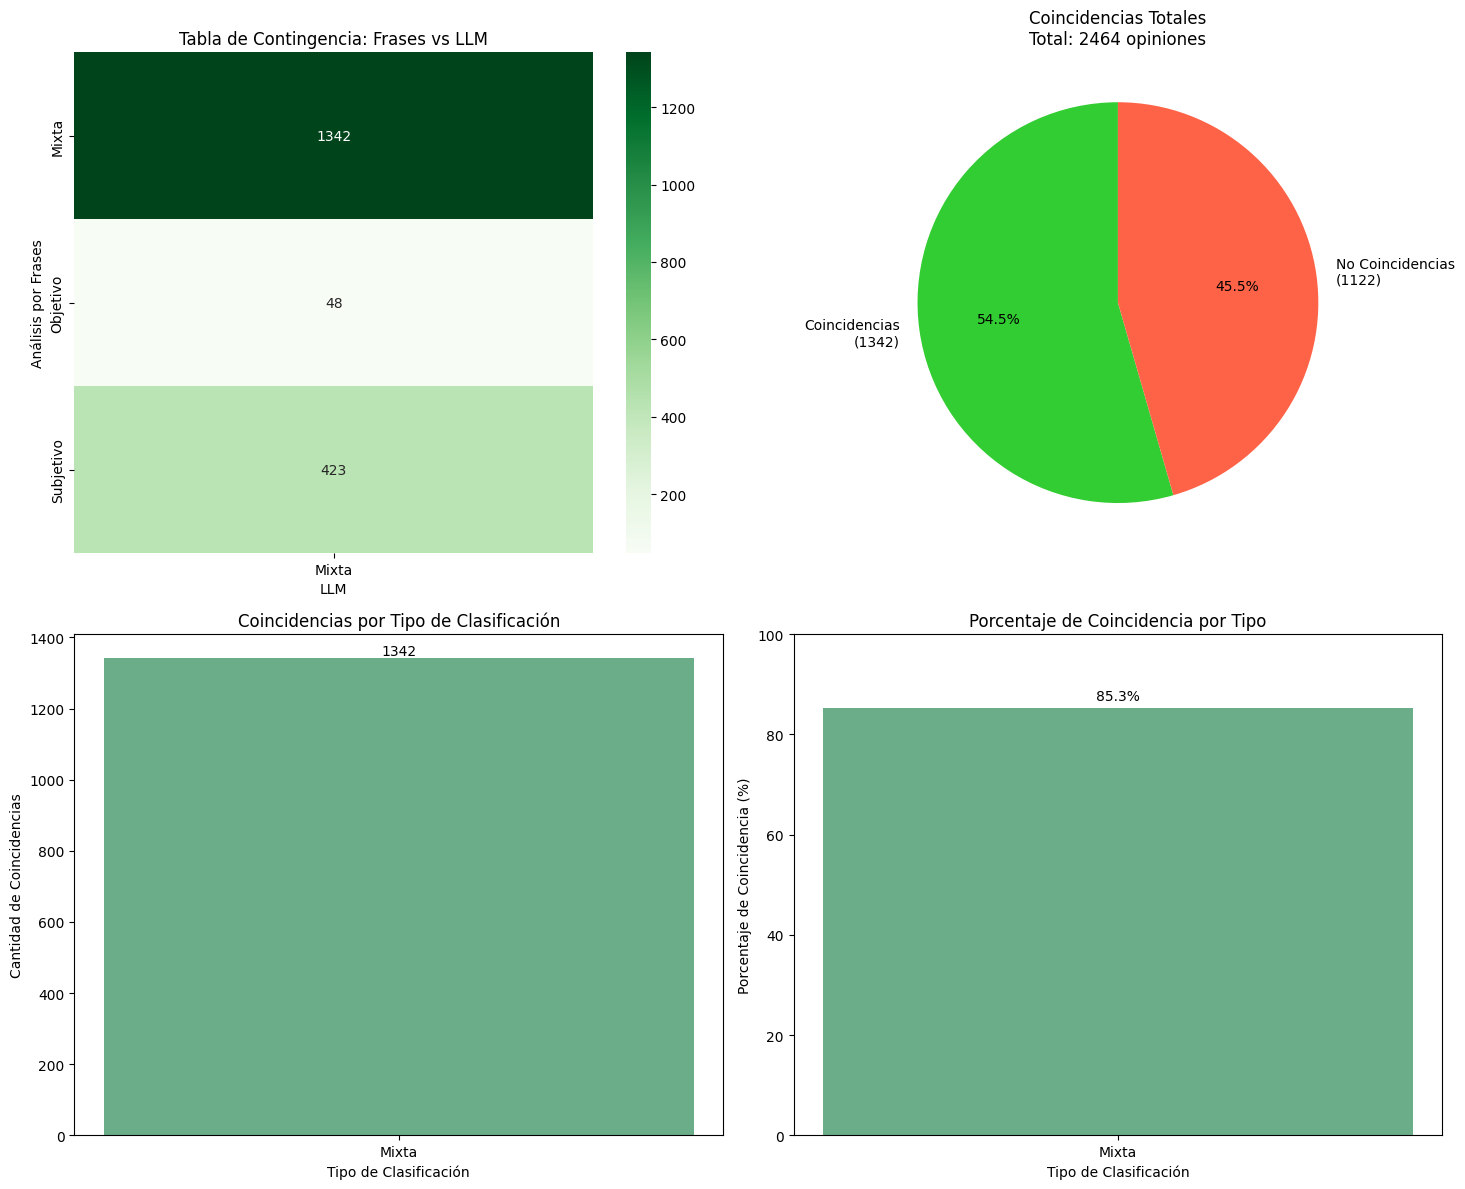

In [6]:
comparador.visualizar_comparacion_frases_llm(resultados_frases_llm)

## 4. Resumen Comparativo de M√©todos

An√°lisis de distribuciones y caracter√≠sticas de cada m√©todo para facilitar la selecci√≥n del mejor enfoque.

In [7]:
print("üìä RESUMEN DE DISTRIBUCIONES POR M√âTODO")
print("=" * 60)

metodos = ['SubjetividadConHF', 'SubjetividadConFrases', 'SubjetividadConLLM']
for metodo in metodos:
    if metodo in df.columns:
        print(f"\nüîπ {metodo}:")
        distribucion = df[metodo].value_counts()
        total = len(df)
        for categoria, cantidad in distribucion.items():
            porcentaje = (cantidad / total * 100)
            print(f"   ‚Ä¢ {categoria}: {cantidad} ({porcentaje:.1f}%)")

print(f"\nüìã Total de opiniones analizadas: {len(df)}")

üìä RESUMEN DE DISTRIBUCIONES POR M√âTODO

üîπ SubjetividadConHF:
   ‚Ä¢ Subjetivo: 2272 (92.2%)
   ‚Ä¢ Objetivo: 192 (7.8%)

üîπ SubjetividadConFrases:
   ‚Ä¢ Mixta: 1574 (63.9%)
   ‚Ä¢ Subjetivo: 827 (33.6%)
   ‚Ä¢ Objetivo: 63 (2.6%)

üîπ SubjetividadConLLM:
   ‚Ä¢ Mixta: 1813 (73.6%)
   ‚Ä¢ Subjetivo: 630 (25.6%)
   ‚Ä¢ Objetivo: 21 (0.9%)

üìã Total de opiniones analizadas: 2464


## 4.1. An√°lisis Detallado de Discrepancias

Examen de casos espec√≠ficos donde los m√©todos difieren en sus clasificaciones para entender mejor las fortalezas y debilidades de cada enfoque.

In [8]:
resultados_discrepancias = analizar_discrepancias_completas(df, n_ejemplos=3)


üîç AN√ÅLISIS DE DISCREPANCIAS ENTRE M√âTODOS
üìä M√©todos comparados: SubjetividadConHF vs SubjetividadConFrases
üìà Total de discrepancias: 1587
üìã Total de opiniones: 2464
üìä Porcentaje de discrepancias: 64.4%

üîÑ TIPOS DE DISCREPANCIAS:
--------------------------------------------------

üî∏ Subjetivo ‚Üí Mixta
   Cantidad: 1432 (90.2% de las discrepancias)
   
üìù Ejemplos:
      1. "La playa con el mejor azul. Es la playa con el azul m√°s intenso de cancun vale la pena ir aunque el oleaje es muy fuerte,  es una de las √∫ltimas playas de la zona hotelera y no hay negocios de comida cerca por lo que te recomiendo llevar tus alimentos. A un lado se encuentra el letrero de cancun donde podr√°s tomarte fotitos de recuerdo."
         SubjetividadConHF: Subjetivo | SubjetividadConFrases: Mixta

      2. "Una de las estructuras m√°s importantes de Puerto Vallarta. El Centro Puerto Vallarta es un lugar destacado por su imponente horizonte del centro de la ciudad, flanqueado po

## 5. An√°lisis Cruzado: Subjetividad vs Sentimientos

An√°lisis de la distribuci√≥n de sentimientos para cada categor√≠a de subjetividad en los m√©todos ternarios (SubjetividadConFrases y SubjetividadConLLM).

**Configurable**: Se puede seleccionar entre SentimientoPorCardiff, SentimientoPorHF o SentimientoPorCalificacion.

In [9]:
from subjetividad import (
    AnalizadorCruzadoSentimientos,
    realizar_analisis_cruzado_completo,
    generar_visualizaciones_cruzadas
)

### Configuraci√≥n del An√°lisis

Selecci√≥n del m√©todo de sentimientos a utilizar en el an√°lisis cruzado.

In [10]:
# Configuraci√≥n: Cambiar aqu√≠ para usar diferente m√©todo de sentimientos
COLUMNA_SENTIMIENTO = 'SentimientoPorHF'  # Opciones: 'SentimientoPorCardiff', 'SentimientoPorHF', 'SentimientoPorCalificacion'

print(f"üéØ M√©todo de sentimientos seleccionado: {COLUMNA_SENTIMIENTO}")
print(f"üìä M√©todos de subjetividad a analizar: SubjetividadConFrases, SubjetividadConLLM")

üéØ M√©todo de sentimientos seleccionado: SentimientoPorHF
üìä M√©todos de subjetividad a analizar: SubjetividadConFrases, SubjetividadConLLM


### 5.1. An√°lisis SubjetividadConFrases vs Sentimientos

An√°lisis de c√≥mo se distribuyen los sentimientos en cada categor√≠a de subjetividad para el m√©todo de an√°lisis por frases.

In [11]:
analizador_cruzado = AnalizadorCruzadoSentimientos(df, COLUMNA_SENTIMIENTO)
resultados_frases = analizador_cruzado.analizar_metodo_subjetividad('SubjetividadConFrases')
analizador_cruzado.mostrar_resumen(resultados_frases)


üìä AN√ÅLISIS CRUZADO: SubjetividadConFrases vs SentimientoPorHF

üîπ Subjetivo:
   Total: 827 opiniones (33.6%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 745 (90.1%)
     ‚Ä¢ Negativo: 53 (6.4%)
     ‚Ä¢ Neutro: 29 (3.5%)

üîπ Mixta:
   Total: 1574 opiniones (63.9%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 1273 (80.9%)
     ‚Ä¢ Negativo: 190 (12.1%)
     ‚Ä¢ Neutro: 111 (7.1%)

üîπ Objetivo:
   Total: 63 opiniones (2.6%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 47 (74.6%)
     ‚Ä¢ Neutro: 8 (12.7%)
     ‚Ä¢ Negativo: 8 (12.7%)


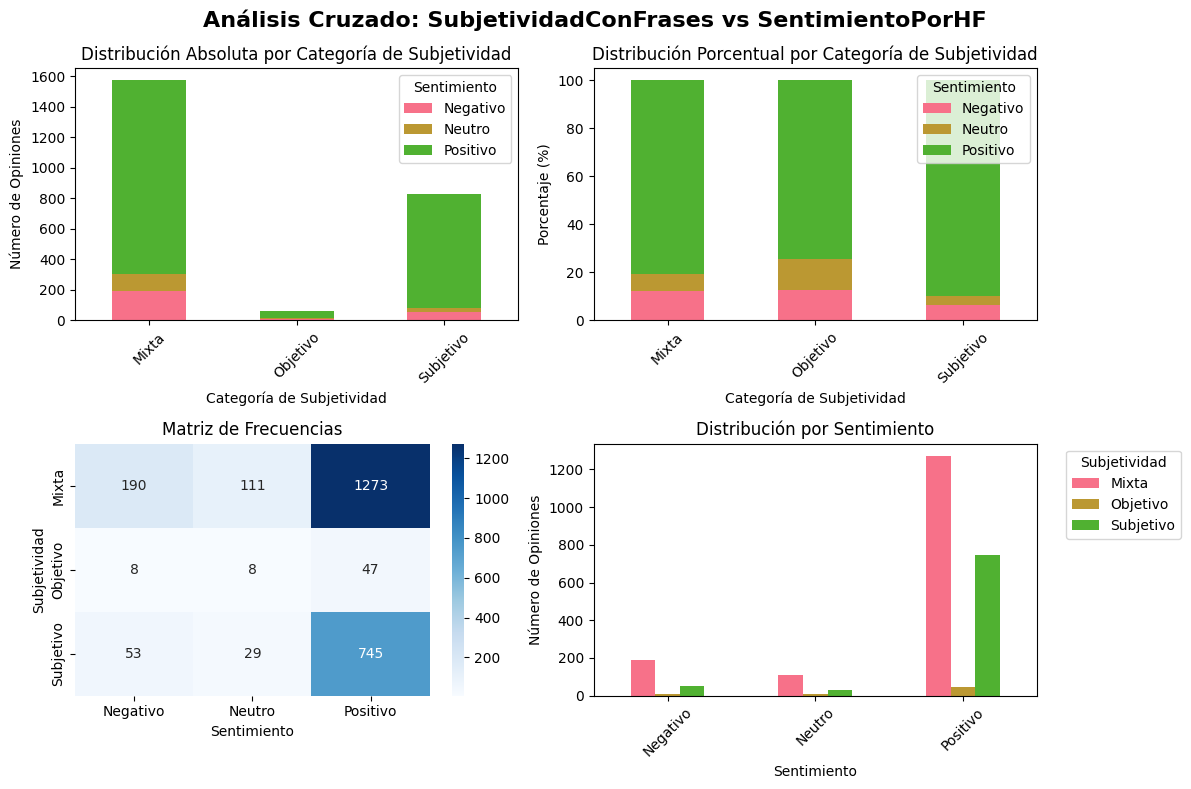

In [12]:
analizador_cruzado.visualizar_analisis(resultados_frases)

#### Ejemplos por Categor√≠a - SubjetividadConFrases

Ejemplos espec√≠ficos de opiniones para cada combinaci√≥n de subjetividad y sentimiento.

In [13]:
ejemplos_frases = analizador_cruzado.obtener_ejemplos_por_categoria('SubjetividadConFrases')
analizador_cruzado.mostrar_ejemplos(ejemplos_frases, 'SubjetividadConFrases')


üìù EJEMPLOS POR CATEGOR√çA - SubjetividadConFrases vs SentimientoPorHF

üè∑Ô∏è  CATEGOR√çA: Subjetivo
--------------------------------------------------

   üí≠ Positivo:

   üìç Ejemplo 1:
      üè® Cdmx - Museo Soumaya
      üì∞ T√≠tulo: La mejor..
      üí¨ Review: Altamente recomendado un gran lugar para admirar grandes obras del.mundo, son varios pisos con historia, me gust√≥ volver√≠a a vivir la experiencia


   üìç Ejemplo 2:
      üè® Cdmx - Museo Nacional De Antropologia
      üì∞ T√≠tulo: Gran museo
      üí¨ Review: Me encanta que puedes conocer grandes cosas sobre la historia de las civilizaciones, y es que aqu√≠ se pueden aprender grandes cosas sobre la historia mexicana.


   üí≠ Negativo:

   üìç Ejemplo 1:
      üè® Cdmx - Acuario Michin Ciudad De Mexico
      üì∞ T√≠tulo: Mi dia en Acuario Michin
      üí¨ Review: No me gusta que te cobren todas la sinteracciones adentro , terminas pagando el doble de lo quevpagas a la entrada . Lo ideal ser√≠a que te

### 5.2. An√°lisis SubjetividadConLLM vs Sentimientos

An√°lisis de c√≥mo se distribuyen los sentimientos en cada categor√≠a de subjetividad para el m√©todo LLM.

In [14]:
resultados_llm = analizador_cruzado.analizar_metodo_subjetividad('SubjetividadConLLM')
analizador_cruzado.mostrar_resumen(resultados_llm)


üìä AN√ÅLISIS CRUZADO: SubjetividadConLLM vs SentimientoPorHF

üîπ Subjetivo:
   Total: 630 opiniones (25.6%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 546 (86.7%)
     ‚Ä¢ Negativo: 78 (12.4%)
     ‚Ä¢ Neutro: 6 (1.0%)

üîπ Mixta:
   Total: 1813 opiniones (73.6%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 1501 (82.8%)
     ‚Ä¢ Negativo: 171 (9.4%)
     ‚Ä¢ Neutro: 141 (7.8%)

üîπ Objetivo:
   Total: 21 opiniones (0.9%)
   Distribuci√≥n por sentimiento:
     ‚Ä¢ Positivo: 18 (85.7%)
     ‚Ä¢ Negativo: 2 (9.5%)
     ‚Ä¢ Neutro: 1 (4.8%)


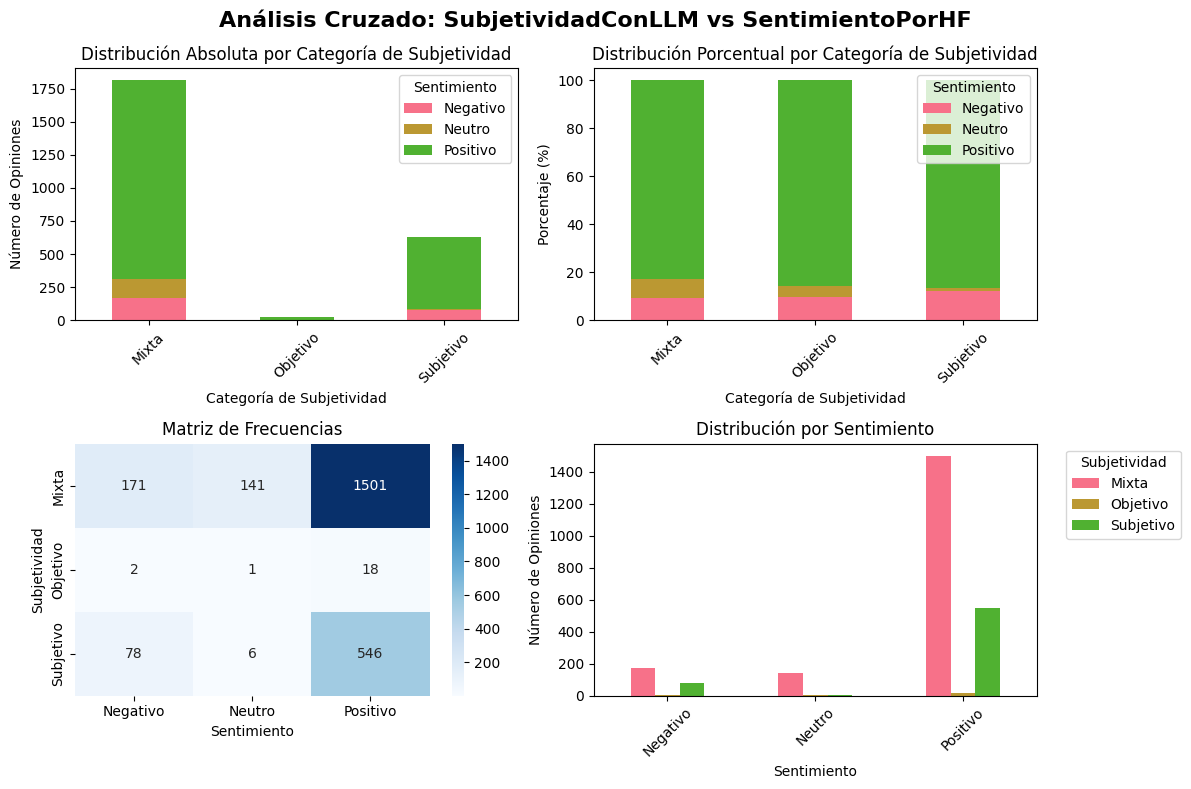

In [15]:
analizador_cruzado.visualizar_analisis(resultados_llm)

#### Ejemplos por Categor√≠a - SubjetividadConLLM

Ejemplos espec√≠ficos de opiniones para cada combinaci√≥n de subjetividad y sentimiento seg√∫n el m√©todo LLM.

In [16]:
ejemplos_llm = analizador_cruzado.obtener_ejemplos_por_categoria('SubjetividadConLLM')
analizador_cruzado.mostrar_ejemplos(ejemplos_llm, 'SubjetividadConLLM')


üìù EJEMPLOS POR CATEGOR√çA - SubjetividadConLLM vs SentimientoPorHF

üè∑Ô∏è  CATEGOR√çA: Subjetivo
--------------------------------------------------

   üí≠ Positivo:

   üìç Ejemplo 1:
      üè® Puebla - Fuertes De Loreto
      üì∞ T√≠tulo: Una puerta al pasado
      üí¨ Review: Sentir el clima que sintieron y vivieron durante el asedio franc√©s, recorrer los pasillos durante la batalla, dar un paso al pasado, dominar la vista de la ciudad que se yergue majestuosa... Eso se siente en el Fuerte, ven y no te arrepentir√°s!!!


   üìç Ejemplo 2:
      üè® Cancun - Avenida Kukulkan
      üì∞ T√≠tulo: Vacation 
      üí¨ Review: Nice place to have a great walk, dinner and enjoy the great weather of Cancun, Good restaurants and a lot of bars to have great time.


   üí≠ Negativo:

   üìç Ejemplo 1:
      üè® Cdmx - Museo Frida Kahlo
      üì∞ T√≠tulo: Tourist Trap. Skip it!
      üí¨ Review: Don't waste your my time and money! Very few Frida artifacts. Mostly souvenir sho

### 5.3. Comparaci√≥n Visual entre M√©todos

Comparaci√≥n lado a lado de c√≥mo cada m√©todo distribuye los sentimientos por categor√≠a de subjetividad.

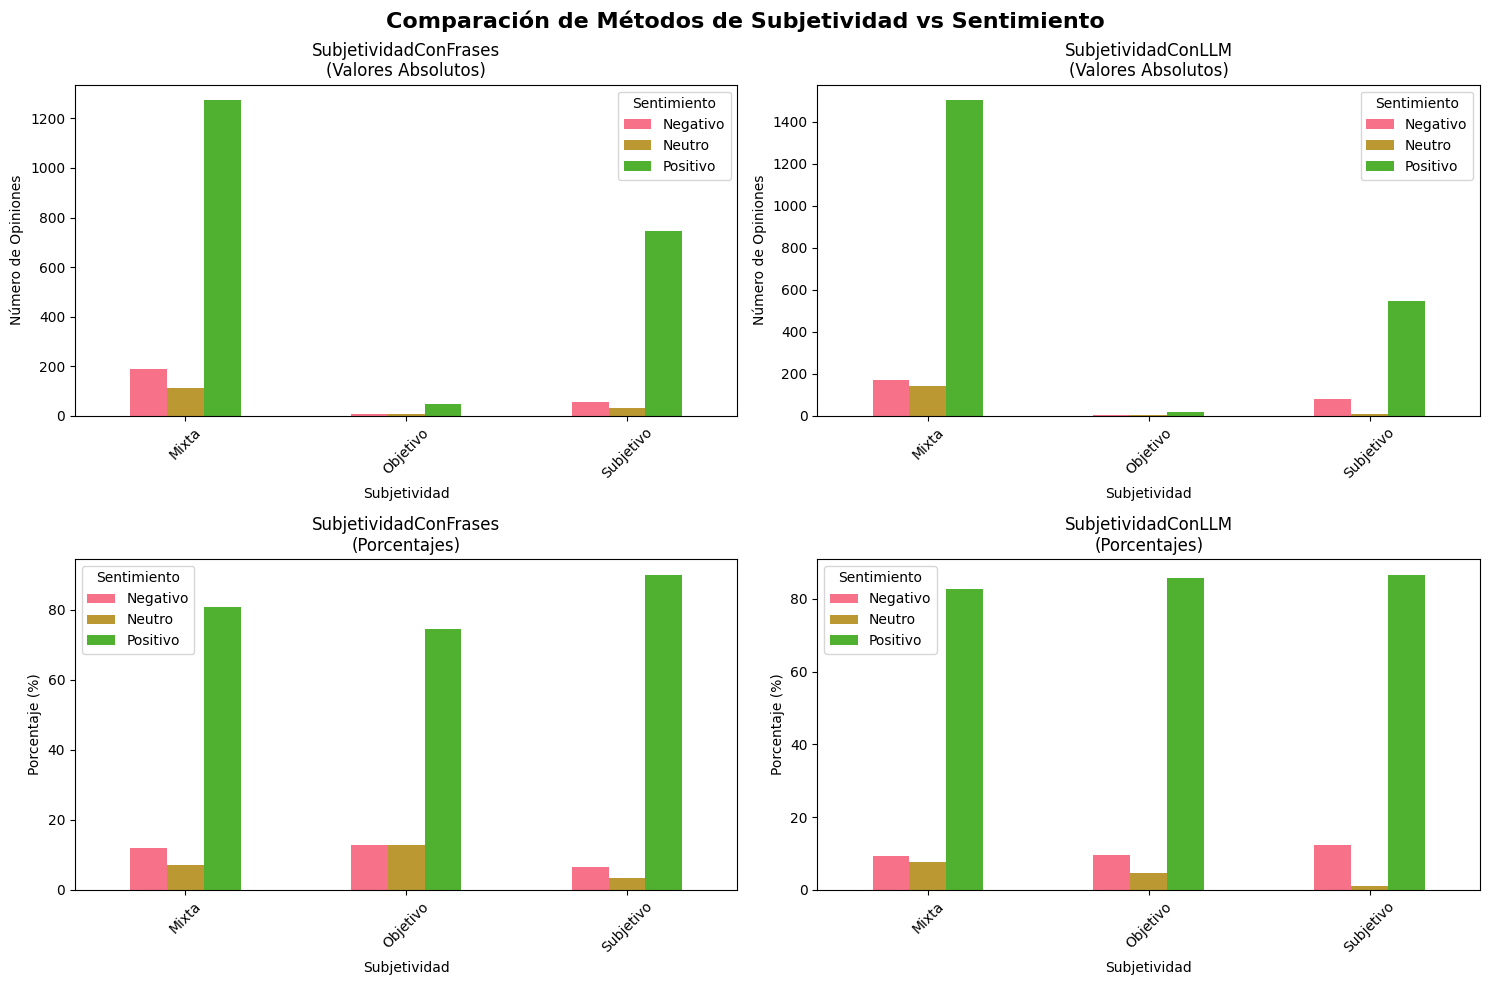

In [17]:
resultados_comparacion = {
    'SubjetividadConFrases': resultados_frases,
    'SubjetividadConLLM': resultados_llm
}
analizador_cruzado.visualizar_comparacion_metodos(resultados_comparacion)

## 6. Conclusiones del An√°lisis Cruzado

### Observaciones Clave:

**Distribuci√≥n por Sentimientos:**
- **Positivo**: An√°lisis de c√≥mo cada m√©todo clasifica las opiniones positivas seg√∫n subjetividad
- **Neutro**: Evaluaci√≥n de opiniones neutras y su clasificaci√≥n de subjetividad  
- **Negativo**: Comportamiento de cada m√©todo ante opiniones negativas

**Comparaci√≥n entre M√©todos:**
- **SubjetividadConFrases**: Ofrece clasificaci√≥n ternaria con detecci√≥n de opiniones mixtas
- **SubjetividadConLLM**: Proporciona an√°lisis m√°s matizado con mayor granularidad

**Patrones Identificados:**
- Relaci√≥n entre la intensidad del sentimiento y la subjetividad detectada
- Diferencias en la clasificaci√≥n de opiniones mixtas entre m√©todos
- Consistencia en la detecci√≥n de patrones emocionales

Este an√°lisis permite seleccionar el m√©todo m√°s adecuado seg√∫n los objetivos espec√≠ficos del an√°lisis de opiniones tur√≠sticas.